**Corner detection**

Processing image: /content/drive/MyDrive/1.png
Number of corners detected: 1597


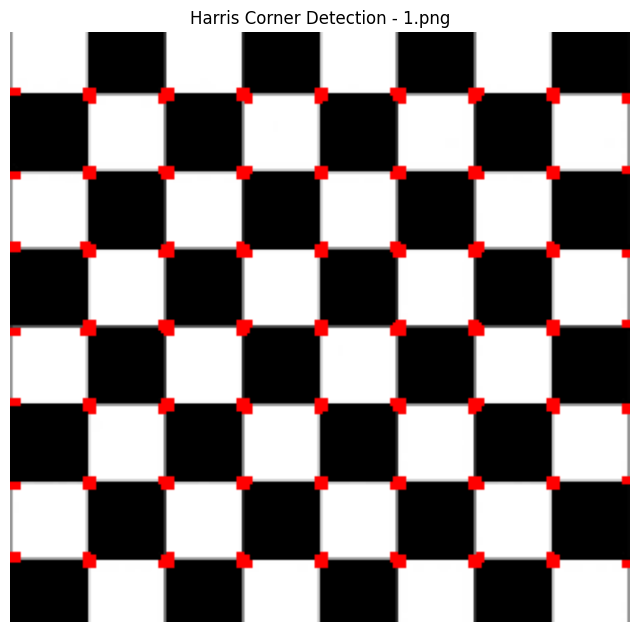

Processing image: /content/drive/MyDrive/2.png
Number of corners detected: 15909


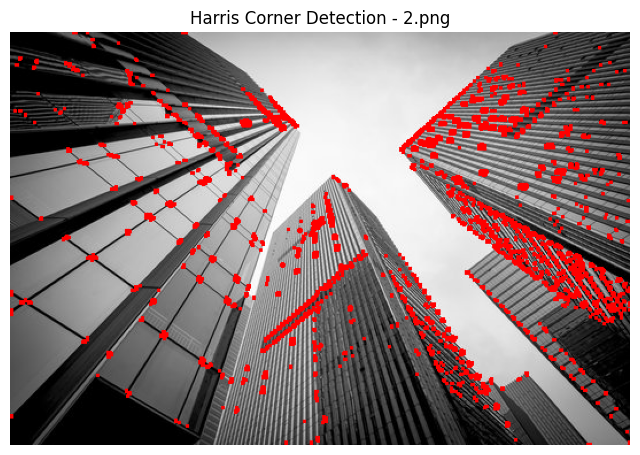

Processing image: /content/drive/MyDrive/3.png
Number of corners detected: 1178


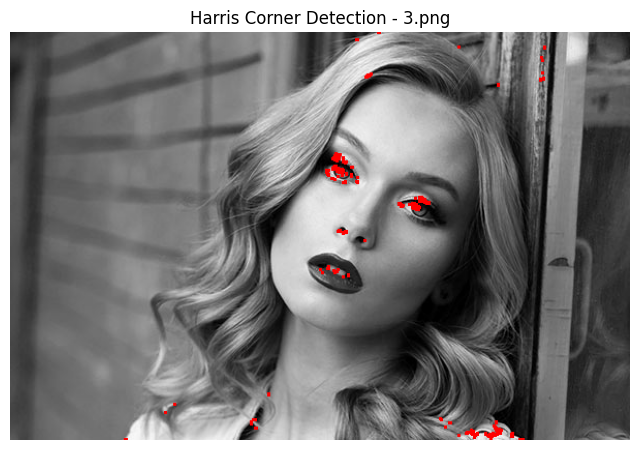

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def harris_corner_detection(image_path, k=0.04, threshold_factor=0.01):
    """
    Detects corners in an image using Harris Corner Detection.

    Parameters:
    - image_path: str, path to the image file.
    - k: float, sensitivity factor for Harris Corner Detection.
    - threshold_factor: float, threshold for corner detection.

    Returns:
    - corners_image: Image with detected corners marked.
    - num_corners: Number of detected corners.
    """
    # Load image and convert to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Convert to float32 for Harris corner detection
    gray = np.float32(gray)

    # Apply Harris corner detection
    dst = cv2.cornerHarris(gray, 2, 3, k)

    # Dilate the corner image to enhance corner visualization
    dst = cv2.dilate(dst, None)

    # Threshold to get the corners
    corners_image = img.copy()
    corners_image[dst > threshold_factor * dst.max()] = [0, 0, 255]

    # Count the number of corners
    num_corners = np.sum(dst > threshold_factor * dst.max())

    return corners_image, num_corners

def process_multiple_images(image_paths):
    """
    Processes a list of images, applies Harris Corner Detection, and visualizes the results.

    Parameters:
    - image_paths: List of image file paths to process.
    """
    for image_path in image_paths:
        print(f"Processing image: {image_path}")

        # Apply Harris Corner Detection
        corners_image, num_corners = harris_corner_detection(image_path)

        # Print the number of corners detected
        print(f"Number of corners detected: {num_corners}")

        # Display the image with detected corners
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(corners_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Harris Corner Detection - {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()

def main():
    """
    Main function to run the Harris Corner Detection on multiple images.
    """
    # List of image file paths
    image_paths = [
        "/content/drive/MyDrive/1.png",
        "/content/drive/MyDrive/2.png",
        "/content/drive/MyDrive/3.png"
    ]

    # Ensure the image files exist
    for image_path in image_paths:
        if not os.path.exists(image_path):
            print(f"Warning: {image_path} does not exist!")
            continue

    # Process the images
    process_multiple_images(image_paths)

if __name__ == "__main__":
    main()


**object recognition by corner detection**

**Steps in the Code:**

*Harris Corner Detection:* Detect corners in all images.

*ORB Descriptor Calculation:* Compute feature descriptors for the corners detected.

*Feature Matching:* Match the original image's features to the other images using a brute-force matcher.

*Similarity Scoring:* Count the number of good matches for each image.

*Determine the Best Match:* The image with the highest number of good matches is the rotated version of the original.

Option 1: Matches (Score: 104)
Option 2: Does Not Match (Score: 34)
Option 3: Matches (Score: 168)


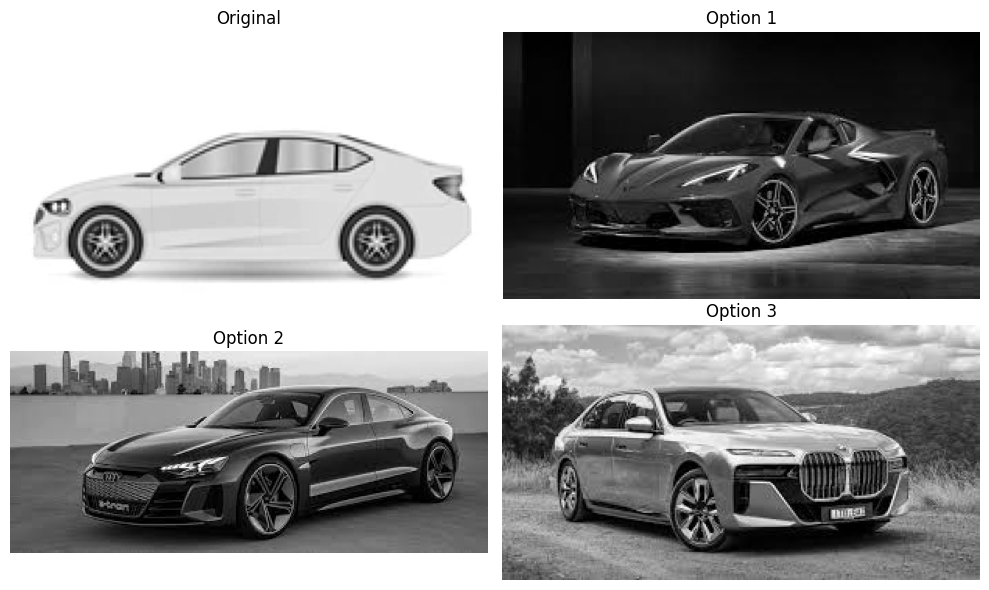

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# File paths
original_image_path = '/content/drive/MyDrive/car.png'
image_paths = [
    '/content/drive/MyDrive/carc.png',  # Rotated Image 1
    '/content/drive/MyDrive/carcn.png',  # Rotated Image 2
    '/content/drive/MyDrive/carcm.png'   # Another Image
]

# Load original image
original = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]
titles = ["Option 1", "Option 2", "Option 3"]

# Function to detect corners using Harris
def detect_corners(img):
    corners = cv2.cornerHarris(np.float32(img), blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)  # Enhance corner points
    threshold = 0.01 * corners.max()
    keypoints = np.argwhere(corners > threshold)  # Select corners above the threshold
    return keypoints

# Compute corner matches
def compare_corners(corners1, corners2):
    # Convert corner arrays to sets of tuples for easy comparison
    corners1_set = set(map(tuple, corners1))
    corners2_set = set(map(tuple, corners2))
    # Compute the intersection of corner sets
    common_corners = corners1_set.intersection(corners2_set)
    return len(common_corners)

# Detect corners in the original image
original_corners = detect_corners(original)

# Compare each image to the original
results = {}
for idx, img in enumerate(images):
    corners = detect_corners(img)
    match_score = compare_corners(original_corners, corners)
    results[titles[idx]] = match_score

# Threshold for determining a match (adjustable)
match_threshold = 50  # Set empirically based on corner density

# Determine matches
for title, score in results.items():
    is_match = score >= match_threshold
    print(f"{title}: {'Matches' if is_match else 'Does Not Match'} (Score: {score})")

# Optional: Display the images
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 2, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()
